# Неделя 1. Среда
## Проверка статистических гипотез

In [1]:
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Задание № 1

Реализовать функцию, позволяющую проверять гипотезу о доле (см. слайды). На вход функция принимает два значения для долей, объем выборки и уровень значимости. 

$H_0: p = p_0$  
$H_1: p \neq p_0$

In [4]:
def proportion_test(p_hat, p_0, n, alpha):
    z_stat = (p_hat - p_0) / np.sqrt(p_0 * (1 - p_0) / n)
    p_value = 2 * (1 - st.norm(0, 1).cdf(abs(z_stat))) # Домножаем на 2, так как проверка двусторонняя
    return z_stat, p_value

#### Проверка

In [9]:
p_hat = 0.55
p_0 = 0.5
alpha = .05
n = 1000

proportion_test(p_hat, p_0, n, alpha)

(3.162277660168382, 0.0015654022580025018)

### Задание № 2 
Реализовать функцию, позволяющую вычислять двухвыборочный t-тест. 
Функция должна принимать следующие аргументы: 
* `sample_1`, `sample_2` - два списка выборочными данными
* `alternative` принимает одно из трех значений: `twosided`, `left`, `right`. Аргумент позволяет контролировать вид проверяемой альтернативы. 
* `alpha` - уровень значимости
* `independent` - `True` или `False`

Функция должна распечатывать результат проверки аналогично примеру выше, а также возвращать значение статистики и `p_value`. 

In [2]:
def ttest(sample_1, sample_2, alternative='twosided', alpha=.05, independent=True):
    
    sample_1 = np.array(sample_1)
    sample_2 = np.array(sample_2)
    
    n1 = len(sample_1)
    n2 = len(sample_2)
    
    if independent:
        sample_1_se = sample_1.var() / n1
        sample_2_se = sample_2.var() / n2
    
        t_stat = (sample_1.mean() - sample_2.mean()) / np.sqrt(sample_1_se + sample_2_se)
        
        if alternative == 'twosided':
            p_value = 2 * st.t(n1 + n2 - 2).cdf(-abs(t_stat))
            if p_value > alpha:
                print(f'Гипотезу H0 принять, на уровне значимости {alpha}')
            else:
                print(f'Гипотезу H0 отклонить, на уровне значимости {alpha}')
        elif alternative == 'greater':
            p_value = 1 - st.t(n1 + n2 - 2).cdf(t_stat)
            if p_value > alpha:
                print(f'Гипотезу H0 принять, на уровне значимости {alpha}')
            else:
                print(f'Гипотезу H0 отклонить, на уровне значимости {alpha}')
        elif alternative == 'less':
            p_value = st.t(n1 + n2 - 2).cdf(t_stat)
            if p_value > alpha:
                print(f'Гипотезу H0 принять, на уровне значимости {alpha}')
            else:
                print(f'Гипотезу H0 отклонить, на уровне значимости {alpha}')
        else:
            raise ValueError("Для аргумента alternative только три режимма - two-sided, less, greater")
                
                
    else:
        if n1 != n2:
            raise ValueError(f"Для зависимых выборок их размер должен быть одинаков, получено - {n1}, {n2}!")
        diff_mean = (sample_1 - sample_2).mean()
        diff_std = (sample_1 - sample_2).std(ddof=1)
        
        t_stat = diff_mean / (diff_std / np.sqrt(n1))
        
        if alternative == 'twosided':
            p_value = 2 * st.t(n1 - 1).cdf(-abs(t_stat))
            if p_value > alpha:
                print(f'Гипотезу H0 принять, на уровне значимости {alpha}')
            else:
                print(f'Гипотезу H0 отклонить, на уровне значимости {alpha}')
        elif alternative == 'greater':
            p_value = 1 - st.t(n1 - 1).cdf(t_stat)
            if p_value > alpha:
                print(f'Гипотезу H0 принять, на уровне значимости {alpha}')
            else:
                print(f'Гипотезу H0 отклонить, на уровне значимости {alpha}')
        elif alternative == 'less':
            p_value = st.t(n1 - 1).cdf(t_stat)
            if p_value > alpha:
                print(f'Гипотезу H0 принять, на уровне значимости {alpha}')
            else:
                print(f'Гипотезу H0 отклонить, на уровне значимости {alpha}')
        else:
            raise ValueError("Для аргумента alternative только три режимма - two-sided, less, greater")
    
    return t_stat, p_value

☑️ Проверьте свой результат с помощью scipy-функций `ttest_ind` (для случай независимых выборок) и `ttest_rel`(для случая зависимых выборок).

#### Проверка

In [18]:
sample_1 = np.random.exponential(size=550)
sample_2 = np.random.exponential(size=550)

print("Для независимых выборок:", end='\n\n')
print("Мой результат:")
display(ttest(sample_1, sample_2, alternative='greater', independent=True))

print("Результат scipy:")
display(st.ttest_ind(sample_1, sample_2, alternative='greater'))

print('-' * 50)


print("Для зависимых выборок:", end='\n\n')
print("Мой результат:")
display(ttest(sample_1, sample_2, alternative='less', independent=False))

print("Результат scipy:")
display(st.ttest_rel(sample_1, sample_2, alternative='less'))

Для независимых выборок:

Мой результат:
Гипотезу H0 принять, на уровне значимости 0.05


(-0.3102377066399286, 0.6217804635378692)

Результат scipy:


TtestResult(statistic=-0.30995554404708986, pvalue=0.6216732099927252, df=1098.0)

--------------------------------------------------
Для зависимых выборок:

Мой результат:
Гипотезу H0 принять, на уровне значимости 0.05


(-0.3009425781929701, 0.3817861101630505)

Результат scipy:


TtestResult(statistic=-0.30094257819297016, pvalue=0.38178611016305036, df=549)

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Пора сохранить изменения для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add 01-05-task.ipynb`
3. Выполни команду `git commit -m "hypothesis tasks in progress"`
4. Выполни команду `git push`

### Задание № 3

Реализовать функцию, позволяющую строить доверительный интервал для среднего. На вход функции поступает выборка (n > 30), уровень значимости. 

In [23]:
def conf_ints(sample: list, alpha: float):
    standard_error = np.sqrt(sample.var(ddof=1) / len(sample))
    delta =  standard_error * st.t(len(sample)-1).ppf(1 - (1 - alpha) / 2)
    lower_bound, upper_bound = sample.mean() - delta, sample.mean() + delta
    return lower_bound, upper_bound

In [24]:
sample = np.random.normal(100, 20, size=10)

In [28]:
print('наше решение:')
display(conf_ints(sample, alpha=0.60))
print('Из коробки:')
display(st.t.interval(loc = sample.mean(), scale=st.sem(sample), confidence=0.6, df=len(sample)-1))

наше решение:


(96.13050904803036, 108.41373907362897)

Из коробки:


(96.13050904803038, 108.41373907362897)

### Задание № 4

Ожидается, что добавление специальных веществ уменьшит жесткость воды. По оценке жесткости воды до и после добавления специальных веществ по $40$ и $50$ пробам соответственно получим средние значения жесткости (в стандартных единицах), равные $4.0$ и $0.8$. Дисперсия измерений в обоих случаях предполагается равной $0.25$. Подтверждают ли эти результаты ожидаемый эффект? Принять $\alpha=0.05$. Контролируемая величина имеет нормальное распределение.

$H_0: mean_1 = mean_2$  
$H_1: mean_1 > mean_2$

In [31]:
n1 = 40
n2 = 50
mean1 = 4
mean2 = 0.8
sigma1 = 0.25
sigma2 = 0.25
alpha = 0.05

z_stat  = (mean2 - mean1) / (np.sqrt(sigma1/n1 + sigma2/n2))
p_value = st.t(50 + 40 - 2).cdf(z_stat)

print(f'Значение статистики - {z_stat}')
print(f'P-value - {p_value}')
if p_value > alpha:
    print(f"Жесткость воды не изменилась на уровне значимости {alpha}")
else:
    print(f"Жесткость воды уменьшилась на уровне значимости {alpha}")

Значение статистики - -30.16988933062603
P-value - 1.7308077794634634e-48
Жесткость воды уменьшилась на уровне значимости 0.05


### Задание № 5

Производительность каждого из агрегатов $А$ и $В$ составила (в кг вещества за час работы):


|Номер замера| 1 | 2 | 3 | 4 | 5 |
|------------|---|---|---|---|---|
|Агрегат А   | 14.1 | 13.1 | 14.7 | 13.7 | 14.0 |
|Агрегат В   |14.0 | 14.5 | 13.7 |  12.7 | 14.1 | 

Можно ли считать производительность агрегатов А и В одинаковой в предложении, что обе выборки получены из нормально распределенных генеральных совокупностей, при уровне значимости $a = 0.1$?  
‼️**УКАЗАНИЕ**: задача решается в два этапа: на первом этапе проверяется гипотеза о равенстве дисперсий случайных величин $А$ и $В$ (производительности рассматриваемых агрегатов $А$ и $В$) с помощью [критерия Фишера](https://ru.wikipedia.org/wiki/F-%D1%82%D0%B5%D1%81%D1%82), на втором этапе проверяется гипотеза о равенстве математических ожиданий тех же случайных величин $А$ и $В$ с помощью [одного из вариантов критерия Стьюдента](https://ru.wikipedia.org/wiki/T-%D0%BA%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%A1%D1%82%D1%8C%D1%8E%D0%B4%D0%B5%D0%BD%D1%82%D0%B0) в зависимости от результата критерия Фишера.

In [38]:
alpha = 0.1

sampleA = np.array([14.1, 13.1, 14.7, 13.7, 14.0])
sampleB = np.array([14.0, 14.5, 13.7, 12.7, 14.1])

sampleA_var = sampleA.var(ddof=1)
sampleB_var = sampleB.var(ddof=1)

f_stat = sampleA_var/sampleB_var

fisher_distr = st.f(dfn=len(sampleA) - 1, dfd=len(sampleB) - 1)

# Гипотеза двусторонняя, а распределение не симметричное, поэтому левый и правый край считаем отдельно
f_crit_lower = fisher_distr.ppf(alpha/2)
f_crit_upper = fisher_distr.ppf(1 - alpha/2)

p_value = 1 - fisher_distr.cdf(f_stat)

print(f'P-value для дисперсий {p_value}')
print(f'Значение статистики для дисперсий {f_stat}')
print(f'Границы интервала {f_crit_lower} {f_crit_upper}')

if f_stat < f_crit_lower or f_stat > f_crit_upper:
    print('Гипотезу H0 о равенстве дисперсий двух агрегаторов отклонить')
else:
    print('Гипотезу H0 о равенстве дисперсий двух агрегаторов принять')

P-value для дисперсий 0.6095528524662563
Значение статистики для дисперсий 0.7434782608695646
Границы интервала 0.15653781167539585 6.388232908695868
Гипотезу H0 о равенстве дисперсий двух агрегаторов принять


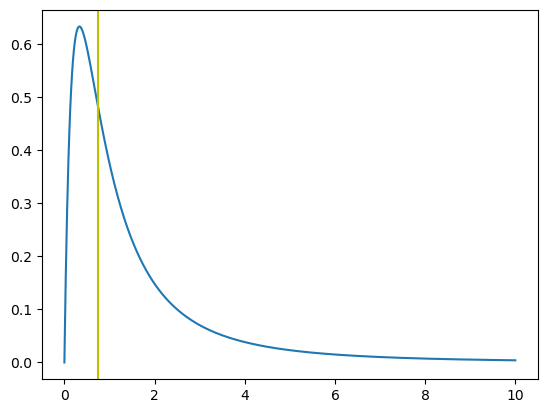

In [37]:
fisher_distr = st.f(dfn=len(sampleA) - 1, dfd=len(sampleB) - 1)


x = np.linspace(0, 10, 1000)
plt.plot(x, fisher_distr.pdf(x))
plt.axvline(f_stat, color='y')

In [33]:
f_stat

0.7434782608695646

In [39]:
t_stat, p_value = st.ttest_ind(sampleA, sampleB, alternative='two-sided')

print(f'P-value для средних {p_value}')
print(f'Значение статистики для средних {f_stat}')

if p_value < alpha:
    print('Гипотезу H0 о равенстве средних двух агрегаторов отклонить')
else:
    print('Гипотезу H0 о равенстве средних двух агрегаторов принять')

P-value для средних 0.7720997680308299
Значение статистики для средних 0.7434782608695646
Гипотезу H0 о равенстве средних двух агрегаторов принять


❓Как вычисляются степени свободы для распределения Фишера?

_Берутся на одну меньше, чем элементов в выборке_

### Задание № 6

Допустим, вы думаете, что $25\%$ студентов вашего университета ни разу не пропустили ни одной лекции. В выборочном опросе из $75$ случайных студентов таких оказалось $15$ человек. Проверьте свою гипотезу на уровне значимости $\alpha = 0.02$ против двусторонних альтернатив. В ответ запишите достигаемый уровень значимости с точностью до четвертого знака.

❓Каким критерием можно проверить эту гипотезу и почему?

> ответ тут

In [174]:
def proportion_test(p_hat, p_0, n, alpha):
    z_stat = (p_hat - p_0) / np.sqrt(p_0 * (1 - p_0) / n)
    p_value = 2 * (1 - st.norm(0, 1).cdf(abs(z_stat))) # Домножаем на 2, так как проверка двусторонняя
    return z_stat, p_value

p_hat = 15/75
p_0 = 0.25
alpha = 0.02
n = 75

proportion_test(p_hat, p_0, n, alpha)

(-0.9999999999999998, 0.31731050786291415)

_Оснований отклонить гипотезу о 25% нет_

### Задание № 7

Допустим мы предполагаем, что стандартное отклонение в стобалльном рейтинге студентов равно $15$. И решаем проверить это, оценив рейтинг знакомых. Получилась выборка объема $n = 20$, у
которой выборочная дисперсия равна $196$. Уровень значимости возьмём $\alpha = 0.1$, а альтернативы рассмотрим двусторонние. Используй для этого соответствующий критерий из `scipy`. 

In [178]:
s_2 = 196
sigma_2 = 225
alpha = 0.1
n = 20

chi_sq_stat = (n-1) * s_2 / sigma_2
chi_sq_crit_lower = st.chi2(n-1).ppf(alpha/2)
chi_sq_crit_upper = st.chi2(n-1).ppf(1 - alpha/2)

p_value = 2 * st.chi2(n-1).cdf(chi_sq_stat)


print(f'P-value для дисперсий {p_value}')
print(f'Значение статистики для дисперсий {chi_sq_stat}')
print(f'Границы интервала {chi_sq_crit_lower} {chi_sq_crit_upper}')

if chi_sq_stat < chi_sq_crit_lower or chi_sq_stat > chi_sq_crit_upper:
    print('Гипотезу H0  отклонить')
else:
    print('Гипотезу H0  принять')

P-value для дисперсий 0.7594999756470793
Значение статистики для дисперсий 16.551111111111112
Границы интервала 10.117013063859044 30.14352720564616
Гипотезу H0  принять


### Задание № 8

Пусть для выборки объема $n = 25$ вычислено среднее  $\bar{x} = 130$. Из предыдущих исследований известно стандартное отклонение $\sigma = 12$. Постройте $98\%$ доверительный интервал для среднего значения.

In [43]:
n = 25
mean = 130
sigma = 12
alpha = 0.98

st.norm.interval(loc = mean, scale = sigma/ np.sqrt(n), confidence=0.98)

(124.41676510230198, 135.58323489769802)

### Задание № 9

Реализуй класс, позволяющий проводить проверку гипотезу о средних для двух выборок. 
1. В конструктор класса передаются две выборки
2. В методе `compute_stat` вычисляется `t` или `z` статистика (соответственно, дисперсия либо вычисляется, либо передается как параметр)
3. В методе `test` проводится тестирование, метод возвращает значение статистики, p_value и результат проверки
4. Выбирается альтернатива: двухсторонняя, правая или левая
5. Уровень значимости по умолчанию равен $0.05$ (может быть переназначен пользователем)
6. Добавь метод, позволяющий вычислять доверительные интервалы для средних для обеих выборок

In [ ]:
class StatTester():
    def __init__(self, sample1, sample2):
        self.sample1 = sample1
        self.sample2 = sample2
        # код
        
    def compute_stat(self, var=None):
        # код
        
    def test(self, ...):
        # код
        return
    
    def compute_conf_ints(self, ...):
        # код
        
        

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Сохрани файл для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add .`
3. Выполни команду `git commit -m "hypothesis tasks completed"`
4. Выполни команду `git push`